<a href="https://colab.research.google.com/github/shahd1995913/-THINK-Surgical/blob/main/EXP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install open3d
!git clone https://github.com/dimitrisPs/scared_toolkit.git
!pip install ./scared_toolkit

# تثبيت DUSt3R
!git clone https://github.com/cvg/DUSt3R.git
%cd DUSt3R
!pip install -r requirements.txt
%cd ..

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 103.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.8 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1
Cloning into 'scared_toolkit'...
remote: Enumerating objects: 339, done.
remote: Counting objects: 100% (339/339), done.
remote: Compressing objects: 100% (185/185), done.
remote: Total 339 (delta 185), reused 296 (delta 148), pack-reuse

In [2]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
!pip install open3d opencv-python-headless matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.8 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
# =========================
# Step 0 — تثبيت المكتبات
# =========================
!pip install opencv-python-headless matplotlib open3d



--2025-11-16 18:32:26--  https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224566 (219K) [image/png]
Saving to: ‘sample_image.jpg’

sample_image.jpg    100%[===================>] 219.30K  --.-KB/s    in 0.09s   

2025-11-16 18:32:26 (2.26 MB/s) - ‘sample_image.jpg’ saved [224566/224566]



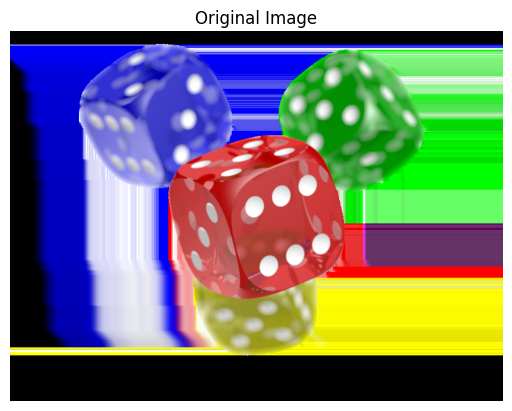

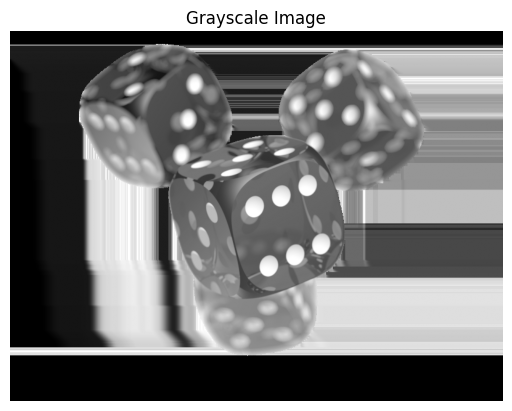

In [ ]:
# =========================
# Step 1 — استيراد المكتبات
# =========================
import cv2
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d
# =========================
# Step 2 — تحميل الصورة من الإنترنت
# =========================
!wget -O sample_image.jpg "https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png"

img = cv2.imread("sample_image.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

# =========================
# Step 3 — تحويل الصورة إلى grayscale (للتجربة)
# =========================
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

# =========================
# Step 4 — إنشاء point cloud وهمي (لتجربة Open3D)
# =========================
h, w = gray.shape
# نقاط وهمية: مجرد شبك pixel coordinates مع قيمة intensity
X, Y = np.meshgrid(np.arange(w), np.arange(h))
Z = gray / 255.0  # جعل القيمة بين 0 و1
points = np.stack([X, Y, Z*50], axis=-1).reshape(-1,3)  # مضاعفة Z للوضوح

colors = np.stack([gray, gray, gray], axis=-1).reshape(-1,3) / 255.0

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
pcd.colors = o3d.utility.Vector3dVector(colors)

o3d.visualization.draw([pcd])

Saving Screenshot 2025-11-16 213516.png to Screenshot 2025-11-16 213516 (2).png


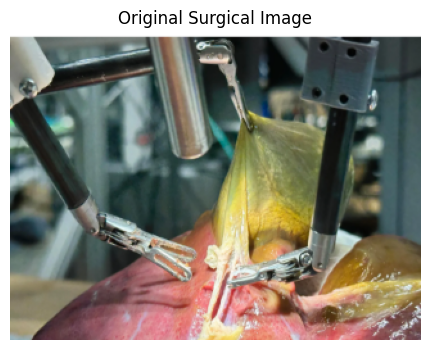

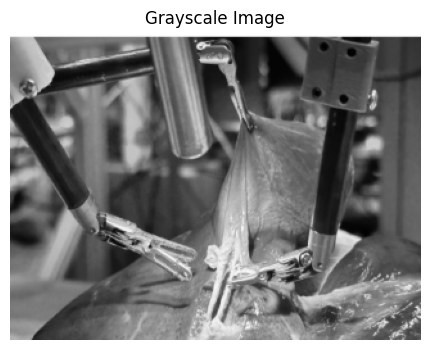

In [1]:

# =========================
# Step 1 — Import libraries
# =========================
import cv2
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d

# =========================
# Step 2 — Upload an image
# =========================
from google.colab import files
uploaded = files.upload()

image_name = list(uploaded.keys())[0]
img = cv2.imread(image_name)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize image to small size to avoid crashes
img_rgb = cv2.resize(img_rgb, (320, 240))
gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# =========================
# Step 3 — Display original image
# =========================
plt.figure(figsize=(6,4))
plt.imshow(img_rgb)
plt.title("Original Surgical Image")
plt.axis('off')
plt.show()

# =========================
# Step 4 — Display grayscale image
# =========================
plt.figure(figsize=(6,4))
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

# =========================
# Step 5 — Create very small point cloud
# =========================
h, w = gray.shape

# Sample every 8 pixels only
factor = 8
X, Y = np.meshgrid(np.arange(0, w, factor), np.arange(0, h, factor))
Z = gray[::factor, ::factor] / 255.0

points = np.stack([X, Y, Z*50], axis=-1).reshape(-1,3)
colors = np.stack([Z, Z, Z], axis=-1).reshape(-1,3)

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
pcd.colors = o3d.utility.Vector3dVector(colors)


--2025-11-16 18:41:58--  https://www.aljazeera.net/wp-content/uploads/2025/07/%D8%A8%D8%A4%D9%84%D8%A765-1752483921.jpg?resize=730%2C410&quality=80
Resolving www.aljazeera.net (www.aljazeera.net)... 23.205.97.57, 2600:1407:7400:1080::2392, 2600:1407:7400:1081::2392
Connecting to www.aljazeera.net (www.aljazeera.net)|23.205.97.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49863 (49K) [image/jpeg]
Saving to: ‘small_surgery.jpg’

small_surgery.jpg   100%[===================>]  48.69K  --.-KB/s    in 0.02s   

2025-11-16 18:41:59 (3.04 MB/s) - ‘small_surgery.jpg’ saved [49863/49863]



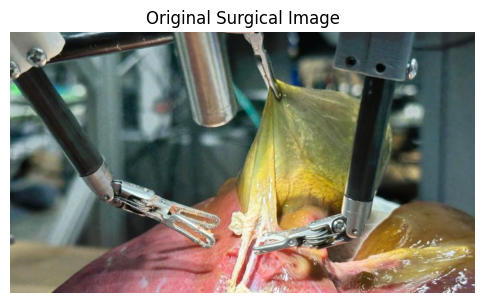

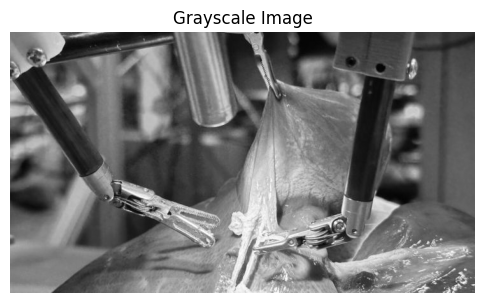

In [ ]:
# =========================
# Step 0 — Install libraries
# =========================
# !pip install opencv-python-headless matplotlib open3d

# =========================
# Step 1 — Import libraries
# =========================
import cv2
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d

# =========================
# Step 2 — Load a working surgical image from the web
# =========================
!wget -O small_surgery.jpg "https://www.aljazeera.net/wp-content/uploads/2025/07/%D8%A8%D8%A4%D9%84%D8%A765-1752483921.jpg?resize=730%2C410&quality=80"

img = cv2.imread("small_surgery.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# =========================
# Step 3 — Display original image
# =========================
plt.figure(figsize=(6,5))
plt.imshow(img_rgb)
plt.title("Original Surgical Image")
plt.axis('off')
plt.show()

# =========================
# Step 4 — Convert to grayscale
# =========================
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(6,5))
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

# =========================
# Step 5 — Create downsampled point cloud
# =========================
h, w = gray.shape
factor = 2  # take every 2nd pixel
X, Y = np.meshgrid(np.arange(0, w, factor), np.arange(0, h, factor))
Z = gray[::factor, ::factor] / 255.0  # scale Z values

points = np.stack([X, Y, Z*20], axis=-1).reshape(-1,3)
colors = np.stack([Z*255, Z*255, Z*255], axis=-1).reshape(-1,3) / 255.0

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
pcd.colors = o3d.utility.Vector3dVector(colors)

# =========================
# Step 6 — Visualize point cloud
# =========================
o3d.visualization.draw([pcd])


--2025-11-16 18:48:00--  https://penangsurgeon.com/wp-content/uploads/sites/23/ports_for_laparoscopic_cholecystectomy.jpg
Resolving penangsurgeon.com (penangsurgeon.com)... 85.187.128.46
Connecting to penangsurgeon.com (penangsurgeon.com)|85.187.128.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53048 (52K) [image/jpeg]
Saving to: ‘surgery_left.jpg’

surgery_left.jpg    100%[===================>]  51.80K   126KB/s    in 0.4s    

2025-11-16 18:48:02 (126 KB/s) - ‘surgery_left.jpg’ saved [53048/53048]



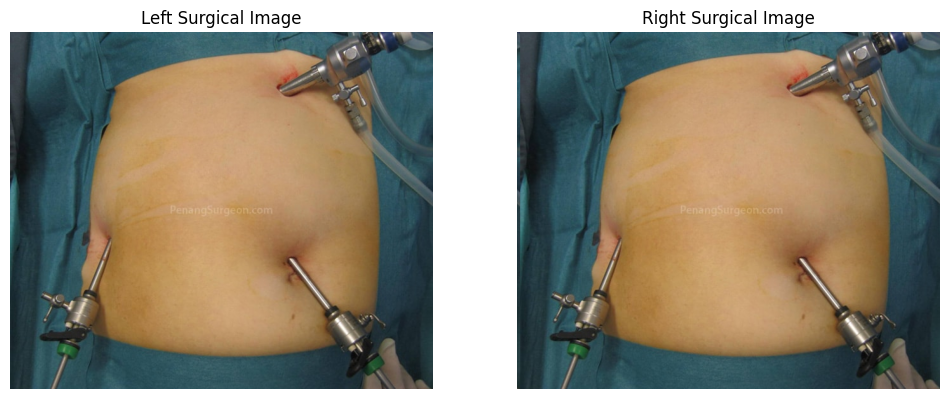

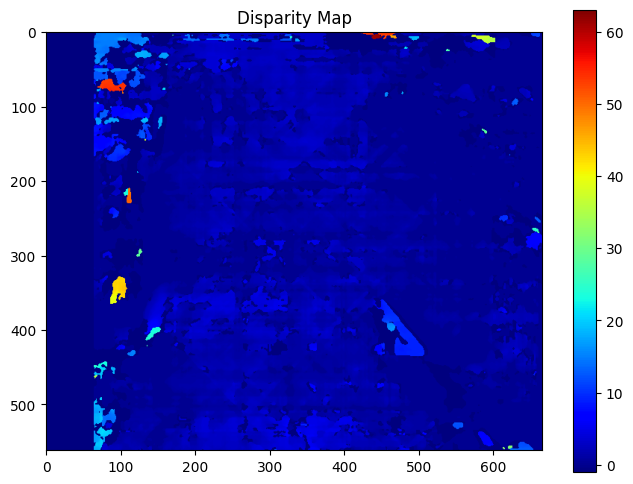

[Open3D WARNING] GLFW Error: Failed to detect any supported platform
[Open3D WARNING] GLFW initialized for headless rendering.
[Open3D WARNING] GLFW Error: OSMesa: Library not found
[Open3D WARNING] Failed to create window
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [3]:
# =========================
# Step 0 — Install required packages
# =========================
# !pip install opencv-python-headless matplotlib open3d

# =========================
# Step 1 — Import libraries
# =========================
import cv2
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d

# =========================
# Step 2 — Load a small surgical image from the web
# =========================
!wget -O surgery_left.jpg "https://penangsurgeon.com/wp-content/uploads/sites/23/ports_for_laparoscopic_cholecystectomy.jpg"

# Read left image
left_img = cv2.imread("surgery_left.jpg")
left_rgb = cv2.cvtColor(left_img, cv2.COLOR_BGR2RGB)

# Create right image by shifting pixels slightly (simulate stereo)
shift = 5  # small horizontal shift
right_rgb = np.roll(left_rgb, shift, axis=1)
right_img = cv2.cvtColor(right_rgb, cv2.COLOR_RGB2BGR)

# =========================
# Step 3 — Display Left & Right Images
# =========================
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(left_rgb)
plt.title("Left Surgical Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(right_rgb)
plt.title("Right Surgical Image")
plt.axis('off')
plt.show()

# =========================
# Step 4 — Convert to grayscale
# =========================
left_gray = cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(right_img, cv2.COLOR_BGR2GRAY)

# =========================
# Step 5 — Compute disparity map
# =========================
stereo = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=64,   # must be divisible by 16
    blockSize=11,
    P1=8*3*11**2,
    P2=32*3*11**2,
    disp12MaxDiff=1,
    uniquenessRatio=10,
    speckleWindowSize=100,
    speckleRange=32
)

disparity = stereo.compute(left_gray, right_gray).astype(np.float32) / 16.0

plt.figure(figsize=(8,6))
plt.imshow(disparity, cmap='jet')
plt.title("Disparity Map")
plt.colorbar()
plt.show()

# =========================
# Step 6 — Create 3D Point Cloud
# =========================
h, w = disparity.shape
fx = fy = 700  # focal length in pixels (example)
B = 0.04       # baseline in meters (example)

# Q matrix for reprojectImageTo3D
Q = np.float32([[1, 0, 0, -w/2],
                [0,-1, 0, h/2],
                [0, 0, 0, -fx],
                [0, 0, 1/B, 0]])

points_3d = cv2.reprojectImageTo3D(disparity, Q)
colors = cv2.cvtColor(left_img, cv2.COLOR_BGR2RGB)

mask = disparity > disparity.min()
out_points = points_3d[mask]
out_colors = colors[mask]

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(out_points)
pcd.colors = o3d.utility.Vector3dVector(out_colors.astype(np.float32)/255.0)

# =========================
# Step 7 — Save & Visualize Point Cloud
# =========================
o3d.io.write_point_cloud("surgery_pointcloud.ply", pcd)
o3d.visualization.draw_geometries([pcd])

--2025-11-16 18:49:57--  https://upload.wikimedia.org/wikipedia/commons/5/55/Gallbladder_in_laparoscopy.jpg?20091116164415
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298570 (292K) [image/jpeg]
Saving to: ‘surgery_left.jpg’

surgery_left.jpg    100%[===================>] 291.57K  --.-KB/s    in 0.1s    

2025-11-16 18:49:58 (2.83 MB/s) - ‘surgery_left.jpg’ saved [298570/298570]



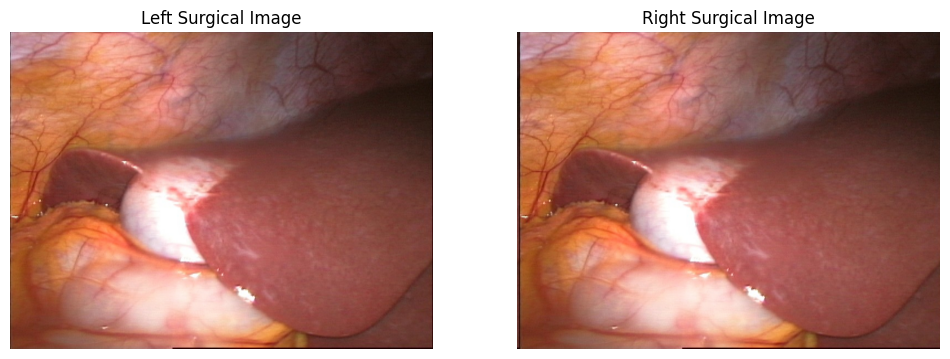

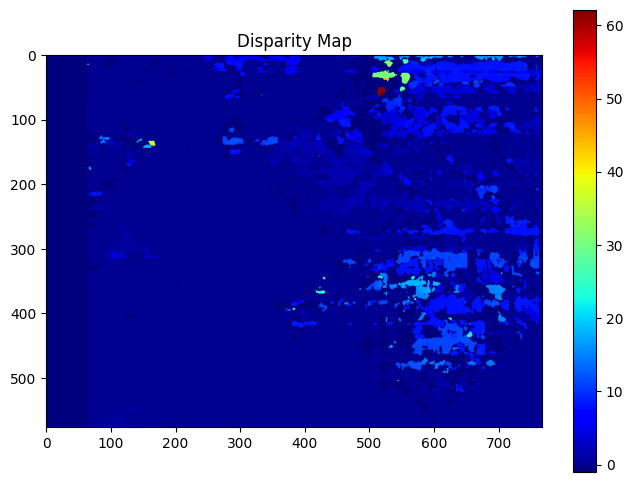

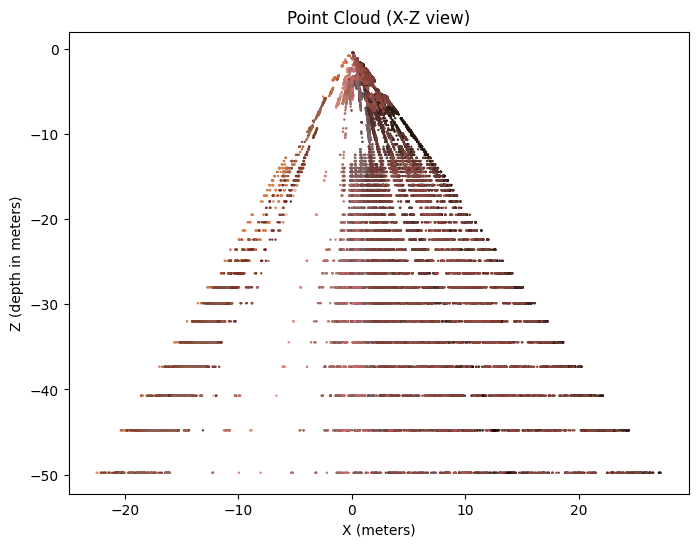

Point Cloud saved as surgery_pointcloud.ply


In [4]:
# =========================
# Step 0 — Install required packages
# =========================
# !pip install opencv-python-headless matplotlib open3d

# =========================
# Step 1 — Import libraries
# =========================
import cv2
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d

# =========================
# Step 2 — Load surgical image
# =========================
!wget -O surgery_left.jpg "https://upload.wikimedia.org/wikipedia/commons/5/55/Gallbladder_in_laparoscopy.jpg?20091116164415"

# Read left image
left_img = cv2.imread("surgery_left.jpg")
if left_img is None:
    raise ValueError("Failed to read image!")
left_rgb = cv2.cvtColor(left_img, cv2.COLOR_BGR2RGB)

# Create right image (simulated stereo)
shift = 5
right_rgb = np.roll(left_rgb, shift, axis=1)
right_img = cv2.cvtColor(right_rgb, cv2.COLOR_RGB2BGR)

# Display stereo images
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(left_rgb)
plt.title("Left Surgical Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(right_rgb)
plt.title("Right Surgical Image")
plt.axis('off')
plt.show()

# =========================
# Step 3 — Convert to grayscale
# =========================
left_gray = cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(right_img, cv2.COLOR_BGR2GRAY)

# =========================
# Step 4 — Compute disparity map
# =========================
stereo = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=64,
    blockSize=11,
    P1=8*3*11**2,
    P2=32*3*11**2,
    disp12MaxDiff=1,
    uniquenessRatio=10,
    speckleWindowSize=100,
    speckleRange=32
)
disparity = stereo.compute(left_gray, right_gray).astype(np.float32) / 16.0

plt.figure(figsize=(8,6))
plt.imshow(disparity, cmap='jet')
plt.title("Disparity Map")
plt.colorbar()
plt.show()

# =========================
# Step 5 — Generate 3D Point Cloud
# =========================
h, w = disparity.shape
fx = fy = 700  # focal length
B = 0.04       # baseline

Q = np.float32([[1,0,0,-w/2],
                [0,-1,0,h/2],
                [0,0,0,-fx],
                [0,0,1/B,0]])

points_3d = cv2.reprojectImageTo3D(disparity, Q)
colors = cv2.cvtColor(left_img, cv2.COLOR_BGR2RGB)

mask = disparity > disparity.min()
points = points_3d[mask]
colors = colors[mask] / 255.0

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
pcd.colors = o3d.utility.Vector3dVector(colors)

# Save point cloud
o3d.io.write_point_cloud("surgery_pointcloud.ply", pcd)

# =========================
# Step 6 — Visualize Point Cloud as 2D depth map
# =========================
depth = points[:,2]
plt.figure(figsize=(8,6))
plt.scatter(points[:,0], points[:,2], c=colors, s=0.5)
plt.title("Point Cloud (X-Z view)")
plt.xlabel("X (meters)")
plt.ylabel("Z (depth in meters)")
plt.show()

print("Point Cloud saved as surgery_pointcloud.ply")
